In [1]:
#Normalizzazione dei Dati: Pulire i dati per rimuovere eventuali valori mancanti o errati. 

import numpy as np
import pandas as pd

dati_climatici = pd.read_csv("/Users/michelavenier/Desktop/EPICODE/7_SETTIMANA/dataset_climatico.csv")
print(dati_climatici.head())

dati_puliti = dati_climatici.dropna().drop_duplicates()

print(dati_puliti.head(), dati_puliti.shape, dati_puliti.columns)

  data_osservazione  temperatura_media  precipitazioni    umidita  \
0        2022-01-01           3.345032       16.712921  66.028263   
1        2022-01-02          34.640506        9.669180  52.891332   
2        2022-01-03           1.223902       17.623765  82.054851   
3        2022-01-04          -5.234223       18.328380  48.785933   
4        2022-01-05          32.792867        5.431022  64.595705   

   velocita_vento stazione_meteorologica  
0       75.580829        Stazione Napoli  
1       22.567745          Stazione Roma  
2       59.792104        Stazione Milano  
3        2.510954        Stazione Milano  
4       83.449843        Stazione Milano  
  data_osservazione  temperatura_media  precipitazioni    umidita  \
0        2022-01-01           3.345032       16.712921  66.028263   
1        2022-01-02          34.640506        9.669180  52.891332   
2        2022-01-03           1.223902       17.623765  82.054851   
3        2022-01-04          -5.234223       18.328

In [2]:
#Applicare la normalizzazione Z-score alla temperatura_media, precipitazioni, umidità e velocità_vento per standardizzarle.

#vedi se ci sono Nan e puoi metterli a 0 oppure eliminarli o altro

#z-score ti da una panoramica di come sono distribuiti i dati
#grafico a punti, istogrammi dipende

#df['zscore'] = (df.["campo1"] - df.["campo1"].mean())/df.["campo1"].std(ddof=0)

#per_ogni_indice_colonna #(per cui ha senso)

media_temperatura = dati_puliti['temperatura_media'].mean()
deviazione_standard_temperatura = dati_puliti['temperatura_media'].std()

media_precipitazioni = dati_puliti['precipitazioni'].mean()
deviazione_standard_precipitazioni = dati_puliti['precipitazioni'].std()

media_umidita = dati_puliti['umidita'].mean()
deviazione_standard_umidita = dati_puliti['umidita'].std()

media_velocita_vento = dati_puliti['velocita_vento'].mean()
deviazione_standard_vento = dati_puliti['velocita_vento'].std()

print("media-std", "\n", "temperatura", media_temperatura, deviazione_standard_temperatura, "\n","precipitazioni", media_precipitazioni,deviazione_standard_precipitazioni, "\n","umidita", media_umidita,deviazione_standard_umidita,  "\n","velocita_vento", media_velocita_vento,deviazione_standard_vento)

#df_temperatura_normalizzata=(x-media)/deviazione standard
z_score_temperatura=(dati_puliti['temperatura_media']-media_temperatura)/deviazione_standard_temperatura
z_score_precipitazioni=(dati_puliti['precipitazioni']-media_precipitazioni)/deviazione_standard_precipitazioni
z_score_umidita=(dati_puliti['umidita']-media_umidita)/deviazione_standard_umidita
z_score_velocita_vento=(dati_puliti['velocita_vento']-media_velocita_vento)/deviazione_standard_vento

print(z_score_temperatura)


#Analisi Esplorativa dei Dati: Calcolare statistiche descrittive (media, mediana, deviazione standard) per ogni variabile. 
print(dati_puliti.describe())


#altrimenti si può calcolare il Z-score in questo modo:
#dati_puliti.insert(loc=6, column='z_score_temperatura', value=z_score_temperatura)

#dataset['z_score_temperatura'] = z_score_temperatura
#dataset['z_score_precipitazioni']= z_score_precipitazioni
#dataset['z_score_umidita']= z_score_umidita
#dataset['z_score_velocita_vento']= z_score_velocita_vento


#altrimenti si può calcolare il Z-score in questo modo:
#dati_puliti['z_score_temperatura']= (dati_puliti['temperatura_media']-dati_puliti['temperatura_media'].mean())/deviazione_standard_temperatura

#altrimenti si può calcolare il Z-score in questo modo:
#import scipy.stats as stats
#dati_puliti['z_score_temperatura'] = stats.zscore(dati_puliti['temperatura_media'])
#dati_puliti['z_score_precipitazioni'] = stats.zscore(dati_puliti['precipitazioni'])
#dati_puliti['z_score_umidita'] = stats.zscore(dati_puliti['umidita'])
#dati_puliti['z_score_velocita_vento'] = stats.zscore(dati_puliti['velocita_vento'])




media-std 
 temperatura 12.61135233844755 13.285323737113018 
 precipitazioni 10.156890783992786 5.848920020890775 
 umidita 60.440852821466784 17.247890828956162 
 velocita_vento 47.61426067463553 28.39836974479787
0     -0.697485
1      1.658157
2     -0.857145
3     -1.343255
4      1.519083
         ...   
995   -1.349752
996    1.373251
997    0.699715
998    0.382082
999    0.982370
Name: temperatura_media, Length: 1000, dtype: float64
       temperatura_media  precipitazioni      umidita  velocita_vento
count        1000.000000     1000.000000  1000.000000     1000.000000
mean           12.611352       10.156891    60.440853       47.614261
std            13.285324        5.848920    17.247891       28.398370
min            -9.975432        0.001474    30.104270        0.007245
25%             1.599811        5.159648    46.463658       22.837375
50%            12.102023       10.268888    59.888175       46.657152
75%            24.227105       15.387652    75.493739       71.8

In [3]:
# Creazione di un nuovo DataFrame chiamato Z_score_df
Z_score_df = pd.DataFrame({
    'z_score_temperatura': z_score_temperatura,
    'z_score_precipitazioni': z_score_precipitazioni,
    'z_score_umidita': z_score_umidita,
    'z_score_velocita_vento': z_score_velocita_vento
})

# Stampa del nuovo DataFrame
print(Z_score_df.head(),Z_score_df.shape,Z_score_df.columns)


   z_score_temperatura  z_score_precipitazioni  z_score_umidita  \
0            -0.697485                1.120896         0.323947   
1             1.658157               -0.083385        -0.437707   
2            -0.857145                1.276624         1.253139   
3            -1.343255                1.397094        -0.675730   
4             1.519083               -0.807990         0.240890   

   z_score_velocita_vento  
0                0.984795  
1               -0.881970  
2                0.428822  
3               -1.588236  
4                1.261889   (1000, 4) Index(['z_score_temperatura', 'z_score_precipitazioni', 'z_score_umidita',
       'z_score_velocita_vento'],
      dtype='object')


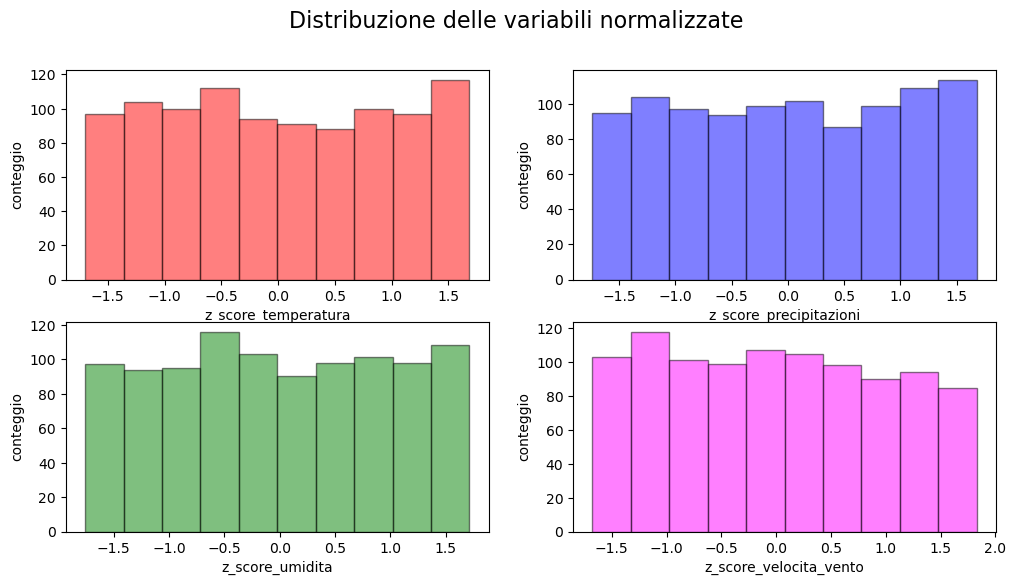

In [4]:
#Analisi Esplorativa dei Dati: Calcolare statistiche descrittive (media, mediana, deviazione standard) per ogni variabile. 
#Creare grafici (istogrammi, box plots) per visualizzare la distribuzione di ciascuna variabile normalizzata.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1) 
plt.hist(Z_score_df["z_score_temperatura"], color= 'red', edgecolor='black', alpha=0.5)
plt.xlabel('z_score_temperatura')
plt.ylabel('conteggio')

plt.subplot(2, 2, 2)
plt.hist(Z_score_df["z_score_precipitazioni"], color= 'blue', edgecolor='black', alpha=0.5)
plt.xlabel('z_score_precipitazioni')
plt.ylabel('conteggio')

plt.subplot(2, 2, 3)
plt.hist(Z_score_df["z_score_umidita"], color= 'green', edgecolor='black', alpha=0.5)
plt.xlabel('z_score_umidita')
plt.ylabel('conteggio')

plt.subplot(2, 2, 4)
plt.hist(Z_score_df["z_score_velocita_vento"], color= 'magenta', edgecolor='black', alpha=0.5)
plt.xlabel('z_score_velocita_vento')
plt.ylabel('conteggio')

plt.suptitle('Distribuzione delle variabili normalizzate', fontsize=16)

plt.show()




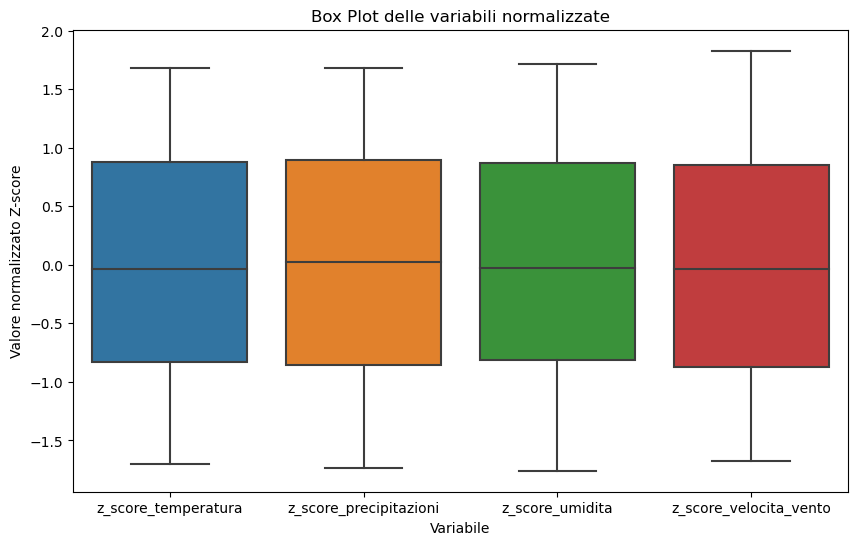

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(Z_score_df[['z_score_temperatura', 'z_score_precipitazioni', 'z_score_umidita', 'z_score_velocita_vento']])
plt.xlabel('Variabile')
plt.ylabel('Valore normalizzato Z-score')
plt.title('Box Plot delle variabili normalizzate')
plt.show()



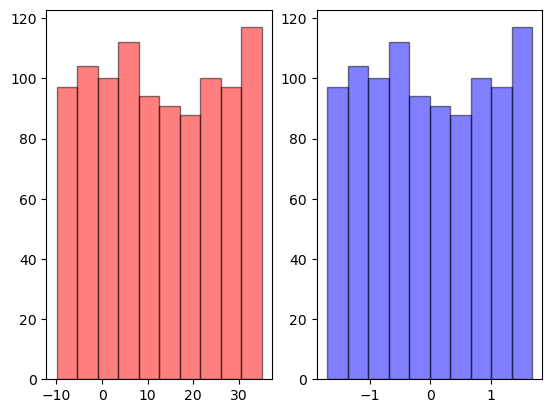

In [6]:

plt.subplot(1, 2, 1) 

plt.hist(dati_puliti["temperatura_media"], color= 'red', edgecolor='black', alpha=0.5)

plt.subplot(1, 2, 2)
plt.hist(Z_score_df["z_score_temperatura"], color= 'blue', edgecolor='black', alpha=0.5)
plt.show()



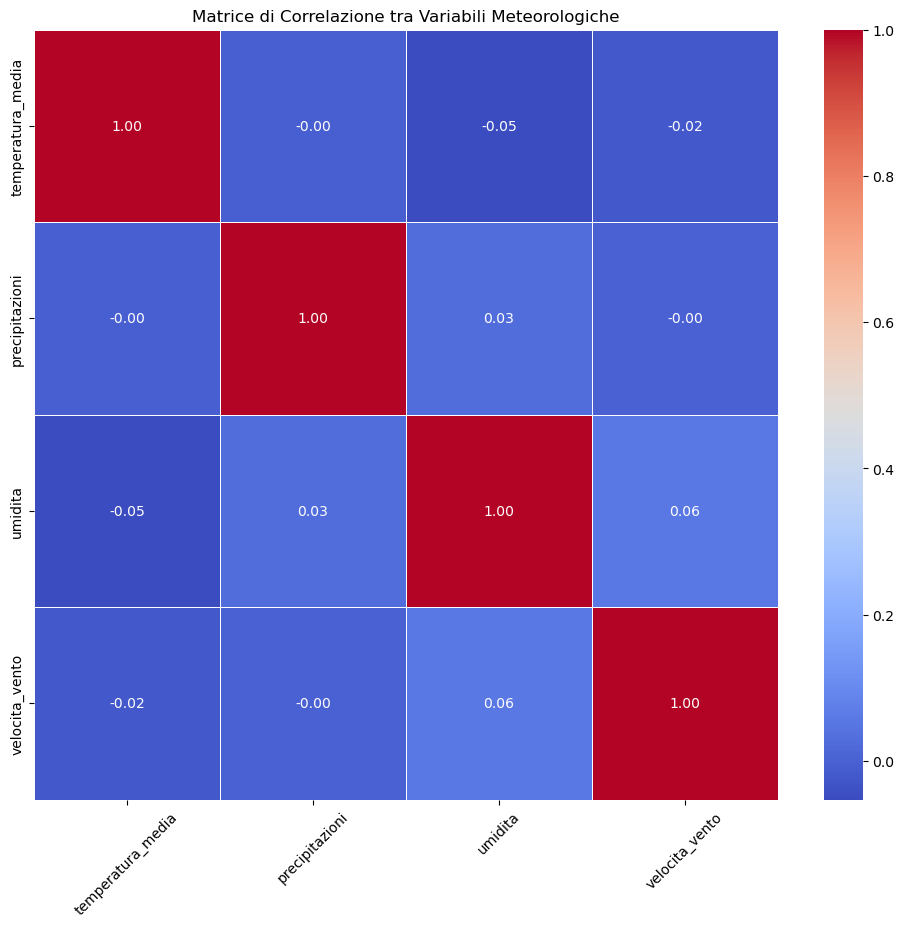

In [7]:
#identifico solo le colonne numeriche dal dataset dati_puliti
colonne_numeriche = dati_puliti.select_dtypes(include='number').columns

#calcolo la matrice di correlazione tra le colonne numeriche di dati_puliti
corr_matrix = dati_puliti[colonne_numeriche].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matrice di Correlazione tra Variabili Meteorologiche')
plt.xticks(rotation=45) 
plt.show()
